# CMSE 202: Semester Group Project

<img src="https://as2.ftcdn.net/jpg/01/24/40/79/500_F_124407905_i8wEGGzf7YVSMkl3aNt0QPnUPe62T0j1.jpg" width=400px>

**Section:** 003

**Group Members and their assigned sections:** 
* Himali Bhandar:Model 
* Amanda Bowerman: Model
* Riley Latham: Data
* Matthew Sitto: Data
* Blake Stewart: Data
* Jalin Lewis: Results 
* Alexis Morse: Results


## Statement of the Problem

#### **How much, quantitatively, do the presidential election debates affect the outcome of a presidential election?**

## Solution


As a group, we have decided to investigate US Presidential debates' speeches from the years 2000 to 2016 and the actual effect of these speeches on the results of President Elections. 

To quantitatively use the speeches we found online, we decided to do Sentiment Analysis on these speeches. The goal for this step was to determine the words in these speeches which had positive and negative connotations associated with them. The total number of positive and negative words in each speech would be used for sentiment analysis later on.
We also collected data on these candidates' political party affiliations, election result, campaign spending, favorability rating (based off of the popular vote), and the voting-eligible population turnout for each election. 

For the modeling section of the project, we decided to a K-nearest Classifier Machine Learning model. We wanted this program to learn to associate the total number of positive and negative words and the result of election together and to determine if having either more positive or negative numbers would affect the result or not. 

After the analysis, we displayed our results using graphs and print statements. 

*Note: Most of the code applied in this notebook has been imported via python files. This was done because each section of the coding project was assigned to a few people in the group. We will be displaying some sample code and print statements in this notebook to show how our code generally worked. For more detailed understanding of the code, please refer to the python files submitted along with this notebook.* 

## Data

This section of the project notebook includes our method of collecting, cleaning, and processing our data through sentiment analyis techniques. We will begin with providing the process in which we collected presidential debate transcripts from the 2000-2016 elections. We then pulled all of the positive and negative sentiment from each candidate and used them as predictors for our classification algorithim on predicting if the candidate won the election. This data will be paired with control data such as candidate's favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election.

Below, we explain the logic behind the sentiment analysis we used for this project with some sample code.

*Note: The debate file that is being pulled into the next step, is just one of the debate files. The process below was repeated for all other debate text files that we had.*

In [1]:
# Import necessary python packages
import pandas as pd
import numpy as np
import nltk

# Expected to return a True Value
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himalibhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Step 1: Import Speech Data

In [2]:
# Import debate transcript, positve and negative word dictionaries.txt files
# Read file and split each word into its own string

debate_path = input('Copy the path to the debate you\'re interested in.')
positive_path = input('Copy the path to the positive word dictionary.')
negative_path = input('Copy the path to the negative word dictionary.')

debate = open(debate_path, encoding="utf-8").read().split()
positive = open(positive_path, encoding="ISO-8859-1").read().split()
negative = open(negative_path, encoding="ISO-8859-1").read().split()

Copy the path to the debate you're interested in.Obama_McCain_101508.txt
Copy the path to the positive word dictionary.positive-words.txt
Copy the path to the negative word dictionary.negative-words.txt


#### Step 2: Separation Of Moderator And the Two Candidates
Step two includes a while loop that iterates backwards through the debate transcript. Once it finds a speaking prompt from either the Moderator, Candidate One, or Candidate Two, it appends the text that exists after the current prompt and before the last prompt in the transcript. It also detaches and deletes this list of strings from the transcript so it is not duplicated. After this process is done, you obtain your separated candidate and moderator lists.

In [3]:
mod_list = []
can1_list = []
can2_list = []

i_new = -1
i_old = -1
while i_new >= -len(debate):
    if debate[i_new] == 'SCHIEFFER:': # Moderator
        mod_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    elif debate[i_new] == 'OBAMA:': # Candidate One
        can1_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    elif debate[i_new] == 'MCCAIN:': # Candidate Two
        can2_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    else: pass
    i_new -= 1

#### Step 3: Removal of Stop Words

In [4]:
# Import "stop words" from nltk package
stop_words = nltk.corpus.stopwords.words('english')

In [5]:
# Iterates through candidate lists and removes "stop words"from the list
can1_list = [x for x in can1_list if x not in stop_words]
can2_list = [x for x in can2_list if x not in stop_words]

#### Step 4: Sentiment Analysis

We will now perform our sentiment analysis and separate the positive and negative connotation words from our candidates talking points during the debate. You will see below the results of each candidate.

In [6]:
# Iterates through candidate lists and separates positive/negative words 
# from the list
can1_pos = [x for x in can1_list if x in positive]
can1_neg = [x for x in can1_list if x in negative]
can2_pos = [x for x in can2_list if x in positive]
can2_neg = [x for x in can2_list if x in negative]

In [7]:
print('Candidate One Total Positive:', len(can1_pos))
print('Candidate Two Total Positive:', len(can2_pos))
print('Candidate One Total Negative:', len(can1_neg))
print('Candidate Two Total Negative:', len(can2_neg))
print('Candidate One Total Sentiment:', len(can1_pos)+len(can1_neg))
print('Candidate Two Total Sentiment:', len(can2_pos)+len(can2_neg))

Candidate One Total Positive: 2558
Candidate Two Total Positive: 2648
Candidate One Total Negative: 1231
Candidate Two Total Negative: 1263
Candidate One Total Sentiment: 3789
Candidate Two Total Sentiment: 3911


#### Step 5: Election Data (Control Factors)

The following data contains information on the presidential candidates from 2000 to 2016. This includes, their names, party, election result, campaign spending, favorability rating (based off of the popular vote), and the voting-eligible population turnout for each election.

In [8]:
#This function will create the dataset that will be needed further for modelling.
def create_data():
    #Reading in the data
    election_data = pd.read_csv('election_data.csv') 
    #Dropping some extra rows
    for row in range(10,19):   
        election_data.drop(index = [row], inplace = True)
    #Making the year look nicer
    election_data['Year'] = election_data['Year'].astype(int)
    #Changing the parties from the first letter to the full name
    for i in range(len(election_data)):      
        if election_data.iloc[i,2] == 'R':
            election_data.iloc[i,2] = 'Republican'
        else:
            election_data.iloc[i,2] = 'Democrat'
    return election_data

In [9]:
#How the dataset will look
create_data()

,Year,Candidate,Political Party,Election Result,Candidate Spending ($1mil),Final Favorability Rating (%),Voting-Eligible Population Turnout (%)
0,2000,Albert Gore,Democrat,L,120.3,48.4,54.2
1,2000,George W. Bush,Republican,W,186.5,47.9,54.2
2,2004,John Kerry,Democrat,L,332.7,48.3,60.1
3,2004,George W. Bush,Republican,W,355.0,50.7,60.1
4,2008,John McCain,Republican,L,239.7,45.6,61.6
5,2008,Barack Obama,Democrat,W,760.4,52.9,61.6
6,2012,Mitt Romney,Republican,L,458.7,47.2,58.6
7,2012,Barack Obama,Democrat,W,737.1,51.1,58.6
8,2016,Hillary Clinton,Democrat,L,450.6,48.2,60.1
9,2016,Donald Trump,Republican,W,239.0,46.1,60.1


## Model 

This section describes the Machine Learning method of K-nearest Classifier method we applied to the Election Data and the other control variables from the previous section. 

We wanted the model to learn to associate the total number of positive words and negative words from a candidate's Presidential debate speeches in a particular year and the control factors including favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election with the election result of that respective year.

Below we are going to explain how the modelling code works. Please refer to the **'Machine_Learning_kNN.py'** file for the complete code.

Also please refer to the following py files for further understanding of the code:

1. **data_00_08.py**
2. **data_12_16.py**
3. **control_variables.py**

The modelling process is explained in detail step by step:

1. **Imports**

    Like any proper code in Python, we need proper imports. The imports we used in this section include Pandas, Numpy, sklearn, Matplotlib and scipy. 
    
    For our convenienve, we converted the data that was prepared in the following section into .py files. We did this because importing all the code in our main modelling process was easier. These files were imported as: **data_00_08**, **data_12_16**, and **control_variables**. Please refer to these files for more explanation on the code done in the data collection process.
    
    
2. **calc_totals**

    This function calculates totals for positive, negative and total sentiment words. It takes a dataset and a year as inputs and gives the totals list as the output. 
    
    
3. **clean_data**

    This function cleans the dataframes data_00_08 and data_12_16 and concats them into one big dataframe which displays the totals for each candidate in every election year. It doesnt take anything as its input since its default input are the datasets from data_00_08 and data_12_16 py files. It gives out a clean merged dataframe as the output.
    
    
4. **create_vectors**

    This function takes the dataframe made from the function clean_data and creates and returns feature and target vectors for the machine learning. This function also grabs the control variables dataframe from the control_variables py file. The feature vectors include the election year,affiliation, positive words, negative words, total sentiment, candidate spending,final favorability rating, and voting eligible population turnout for that specific election. The target vector includes election results, either 'L' for Lose or 'W' for Win.
    This function retunr the feature_vector list, target_vector list, win_data and totals dataframes.
    
    
5. **train**

    This function trains the feature and target vectors taken from the previous function, create_vectors. It takes 'size' as the input which will define what percentage of data we want to take as the training data and testing data. It uses the *sklearn.model_selection* package's functin, *train_test_split* for splitting the training and testing data. It returns x_train, y_train, y_test and x-test arrays and also the win_data and totals dataframes.
    
    
6. **predict**

    This function uses all previous functions and gives us the actual prediction we desire. It takes k, size and x_input as inputs.The k refers to the number of neighbors we wish to check on. The size refers to the percentage of data we want to be training data and testing data (from the function train). The x_input is optional input if we want to test the some other feature vectors for prediction of future elections. 
    
    This function uses *kNeighborsClassifier* function from the package *sklearn.neighbors* for calculating the classifier that will be fitted to predict the results. The function also taken in the condition of when there is a value given for x_input. The function overall returns y_pred (the predictions), accuracy of the predict function, and all the training and testing data along with the win_data and totals dataframes.
    

    





## Results
For our results a number of conclusions were made. First, we take a look at the machine learning of prediction of outcome for the model. Having to choose between between five random but pre-determined paramters, we saw what is given below. Though we wanted to run all the possible paramters at once, ultimately we realized this wasnt a possibility becasue the program ran for at least 99 seconds, before producing a results. Therefore, importing a 2D Array would take at least 25+ minutes in order to produce a result. Kind of reminds you of 2001. Sure that works for a finished product, but any little change that need to be corrected into the program itself is entirely too time consuming and therefore not practical. Hence, why we decided to test the outcomes on a case by case basis. Through trails and error we realied that a k-step of 3 with a t of 0.4, generally gave the best accuracy for the program. Below shows a sample of the results.

In [24]:
from Machine_Learning_KNN import predict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd    

In [33]:
ypredict, accuracy_k, ytest, ytrain, xtrain, xtest, win_data, election_data = predict(3,0.4)

In [34]:
win_data

,Year,Candidate,Political Party,Election Result,Candidate Spending ($1mil),Final Favorability Rating (%),Voting-Eligible Population Turnout (%)
0,2000,Albert Gore,Democrat,L,120.3,48.4,54.2
1,2000,George W. Bush,Republican,W,186.5,47.9,54.2
3,2004,George W. Bush,Republican,W,355.0,50.7,60.1
2,2004,John Kerry,Democrat,L,332.7,48.3,60.1
5,2008,Barack Obama,Democrat,W,760.4,52.9,61.6
4,2008,John McCain,Republican,L,239.7,45.6,61.6
7,2012,Barack Obama,Democrat,W,737.1,51.1,58.6
6,2012,Mitt Romney,Republican,L,458.7,47.2,58.6
9,2016,Donald Trump,Republican,W,239.0,46.1,60.1
8,2016,Hillary Clinton,Democrat,L,450.6,48.2,60.1


In [35]:
election_data

,Election_Year,Candidate_Name,Affiliation,Positive_Words,Negative_Words,Total_Sentiment
0,2000,Albert A. Gore,1,9145,4459,13604
1,2000,George W. Bush,0,10173,4835,15008
2,2004,George W. Bush,0,9248,4627,13875
3,2004,John F. Kerry,1,9006,4430,13436
4,2008,Barack H. Obama,1,7100,4526,11626
5,2008,John S. McCain,0,6758,4208,10966
6,2012,Barack Obama,1,11633,5579,17212
7,2012,Mitt Romney,0,13303,6344,19647
8,2016,Donald Trump,0,13928,12017,25945
9,2016,Hillary Clinton,1,11796,10120,21916


In [36]:
xtrain

[[2000, 1, 9145, 4459, 13604, 120.3, 48.4, 54.2],
 [2008, 0, 6758, 4208, 10966, 760.4, 52.9, 61.6],
 [2000, 0, 10173, 4835, 15008, 186.5, 47.9, 54.2],
 [2004, 1, 9006, 4430, 13436, 355.0, 50.7, 60.1],
 [2008, 1, 7100, 4526, 11626, 239.7, 45.6, 61.6],
 [2004, 0, 9248, 4627, 13875, 332.7, 48.3, 60.1]]

In [37]:
xtest

[[2016, 1, 11796, 10120, 21916, 239.0, 46.1, 60.1],
 [2012, 0, 13303, 6344, 19647, 737.1, 51.1, 58.6],
 [2016, 0, 13928, 12017, 25945, 450.6, 48.2, 60.1],
 [2012, 1, 11633, 5579, 17212, 458.7, 47.2, 58.6]]

In [38]:
print(ypredict)

['W' 'W' 'W' 'W']


In [39]:
print(ytest)

['L', 'L', 'W', 'W']


Below are the graphical representation of our results.

4


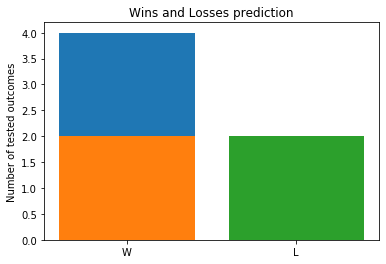

In [42]:
#First set the conditions in order to analyze the predict function
height1 = len(ypredict)
height2 = len(ytest)
wins_predict = []
loss_predict = []
win_count = 0
loss_count = 0
win_test = []
loss_test = []
win_count_test = 0
loss_count_test = 0
#for loop to seperate the results into bins
for i in ypredict:
    if i == "W":
        win_count+=1
        wins_predict.append(i)
    else:
        loss_count += 1
        loss_predict.append(i)
for j in ytest:
    if j == "W":
        win_count_test+=1
        win_test.append(j)
    else:
        loss_count_test+=1
        loss_test.append(j)
#plot the results to vsiualize the outcome
print(win_count)
plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count, color = "k")
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)
plt.title("Wins and Losses prediction")
plt.ylabel("Number of tested outcomes")
plt.show()

Here we place some results on the amount of sentiment used for our testing. Though the testing itself gave a smaller smaple soultion, its still crucial to look at the big picture to understand the program of itself.Here we use a scatter plot to look at the negative and positive "words" or sentiment within presidential debate speeches dating back to 2000. An interesting trend that can be seen is that in general there are less negative words than positive within speeches traditionally. However, it can also be observed that there have been increasingly more negative words being used in the speechs than previously before, where the trend almost triples in negative words or sentiments. The jump is particularly noticeable in the recent debates between Hillary Clinton and Donald Trump. The other intersting observation is the actual total sentiment or "word count". It generally stabilizes around 4000-5000 total words. This trend may dip or rise within a 750 word difference but again the trend begins to sky rocket between Hillary Clinton and Donald Trump. With Donald Trump having the highesst word count of just above 10000 and a "positive sentiment" of only 5700 or about 57%, if percentages were involved which ultimately, and undoubtedly means that President Donald Trump, talks entirely too much. See results below.



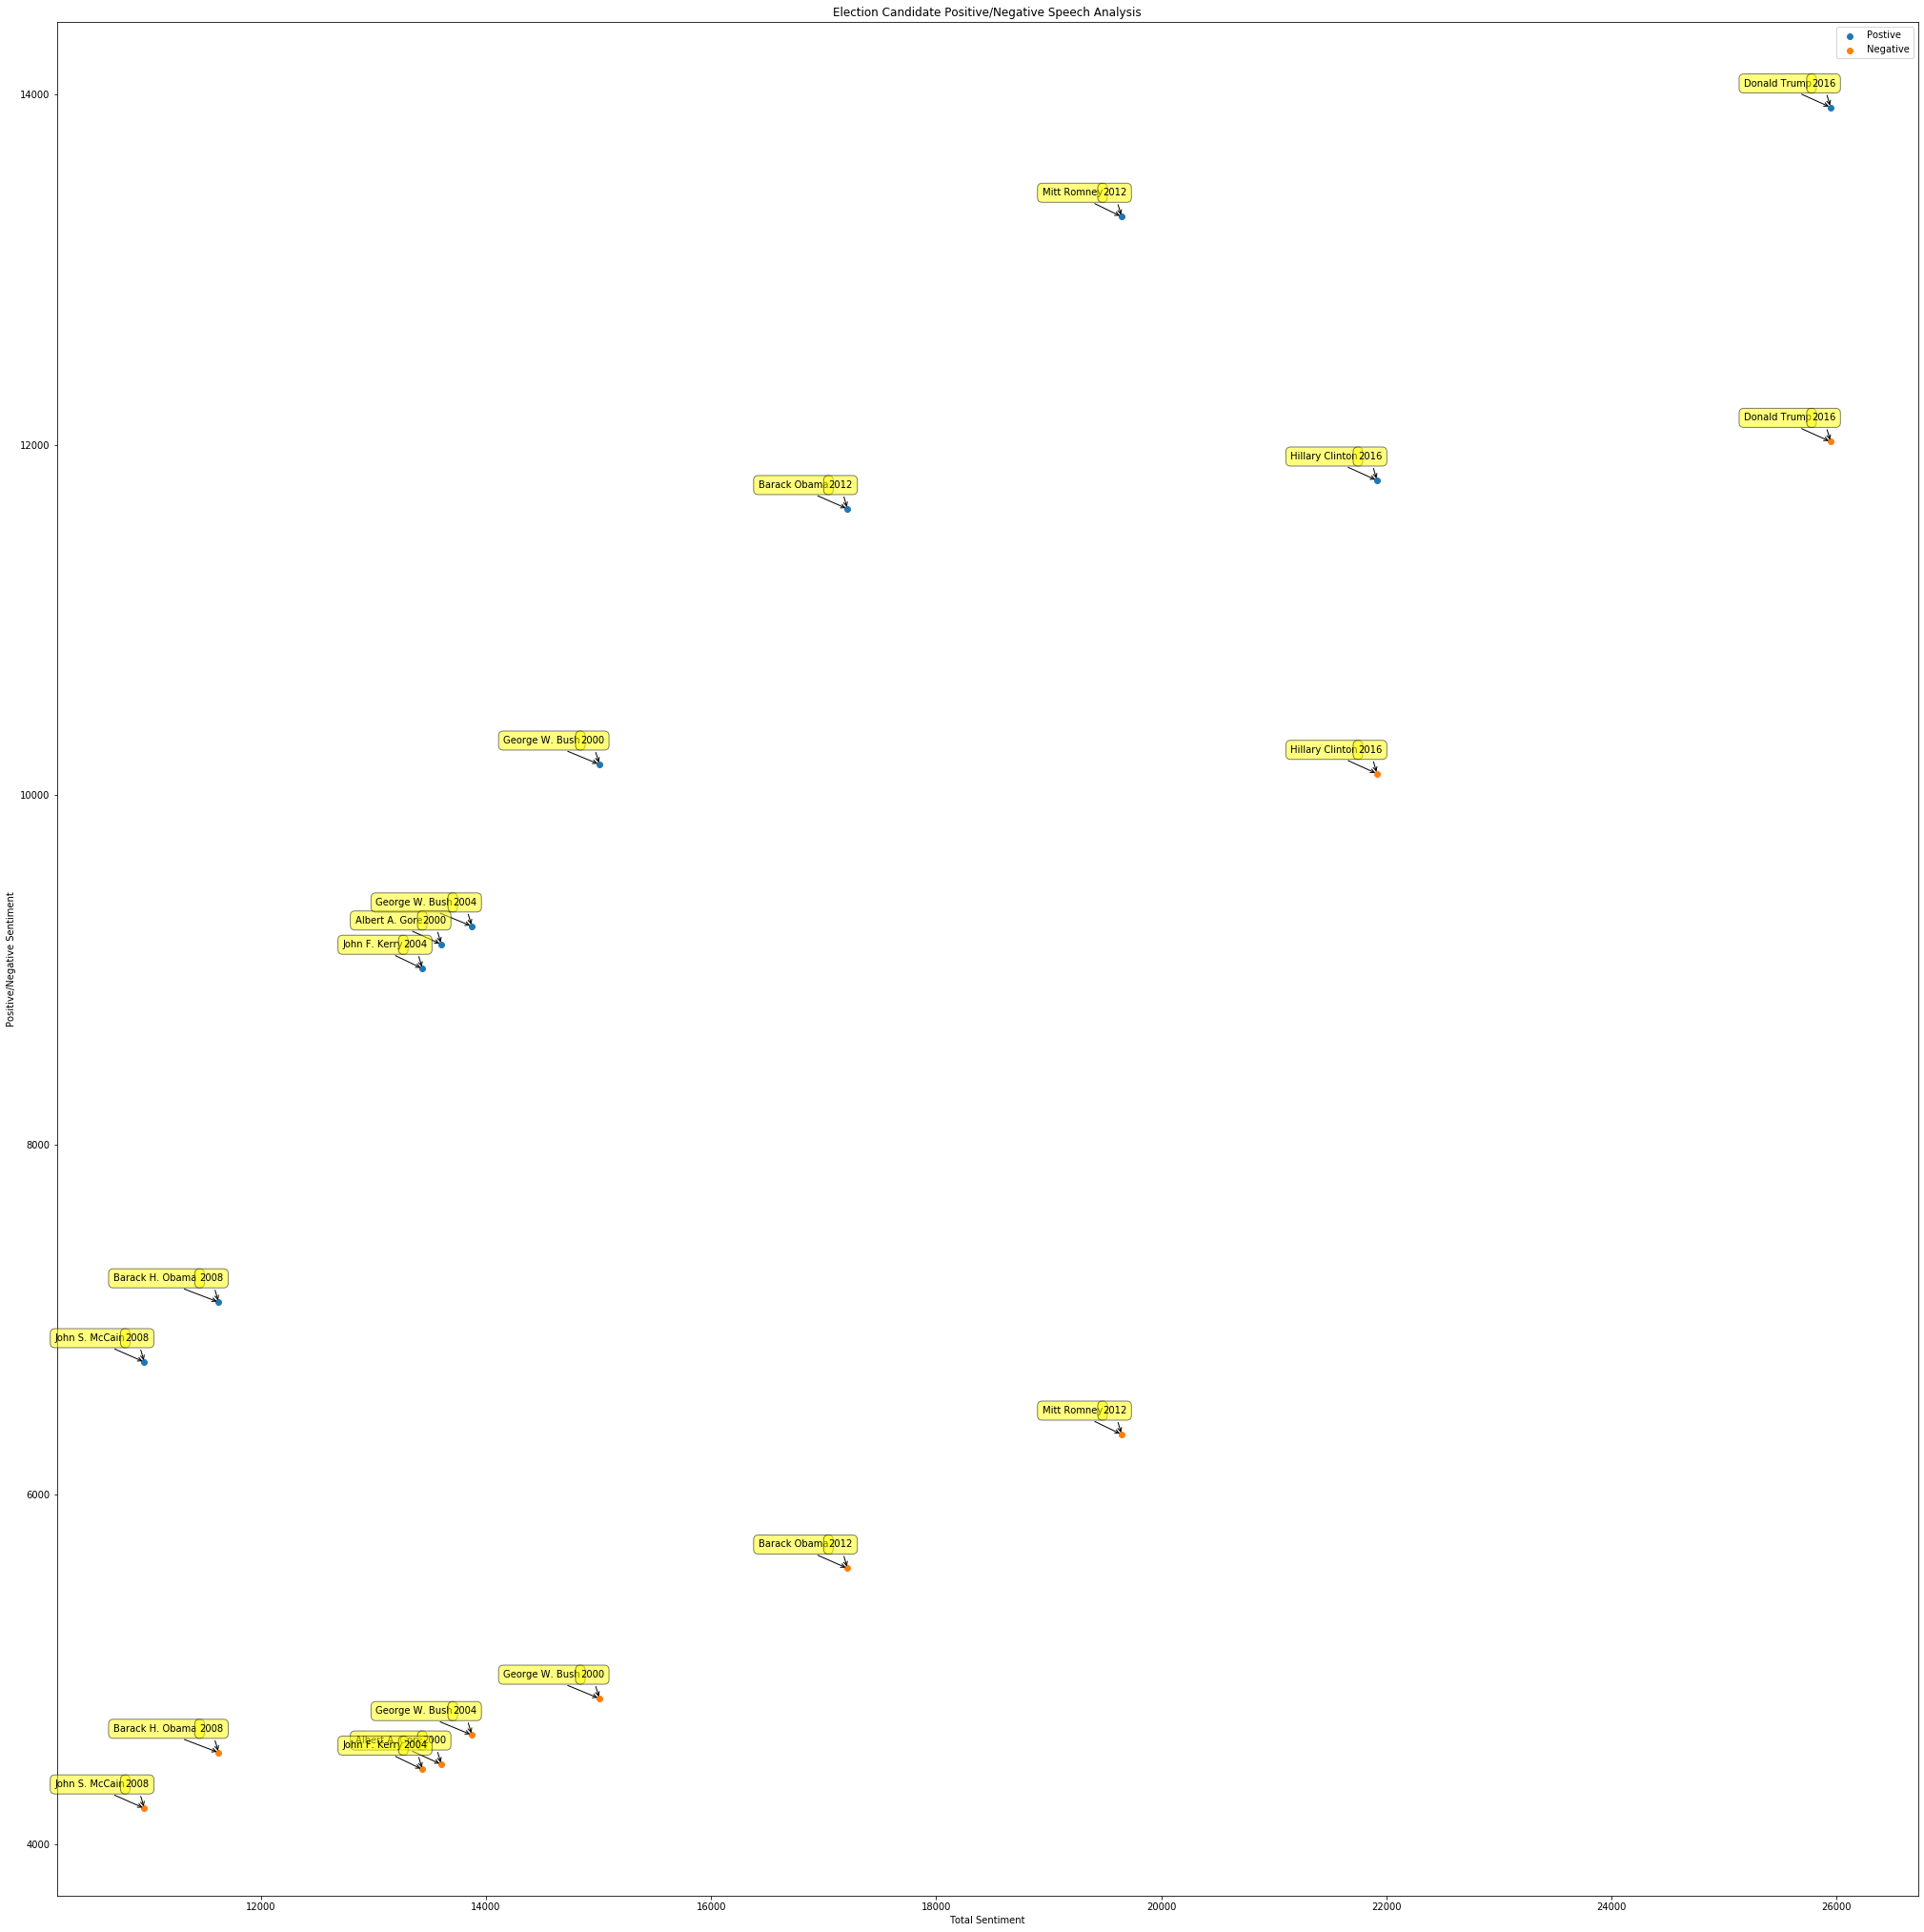

In [43]:
labels= election_data["Candidate_Name"]
labels2 = election_data["Election_Year"]
y_pos = election_data["Positive_Words"]
x_both= election_data["Total_Sentiment"]
y_neg = election_data["Negative_Words"]

plt.figure(figsize = (35,35))
plt.title("Election Candidate Positive/Negative Speech Analysis")
plt.xlabel("Total Sentiment")
plt.ylabel("Positive/Negative Sentiment")
plt.scatter(x_both,y_pos, label = "Postive")
plt.scatter(x_both,y_neg, label = "Negative")
plt.subplots_adjust(bottom = 0.1)

for label, x, y in zip(labels, x_both, y_pos):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(labels, x_both, y_neg):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(labels2, x_both, y_pos):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='left', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(labels2, x_both, y_neg):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='left', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend()    
plt.show()

In [44]:
print(accuracy_k)

0.5


## Conclusions 

Some issues we might run into are:

* Finding proper data without any inconsistencies for both the speeches and approval rates.
* Deciding on an appropriate pre-defined sentiment.
* Likely issues in the actual word processing. 



## References

* “Debate Transcripts.” CPD: Debate Transcripts, www.debates.org/voter-education/debate-transcripts/.
* “Election Listing: The American Presidency Project.” Election Listing | The American Presidency Project, www.presidency.ucsb.edu/statistics/elections.
* “Data Archive.” Data Archive | The American Presidency Project, www.presidency.ucsb.edu/statistics/data.
* The Editors of Encyclopaedia Britannica. “United States Presidential Election Results.” Encyclopaedia Britannica, Encyclopædia Britannica, Inc., 3 Feb. 2017, www.britannica.com/topic/United-States-Presidential-Election-Results-1788863.